In [1]:
# The C2QA package is currently not published to PyPI.
# To use the package locally, add the C2QA repository's root folder to the path prior to importing c2qa.
import os
import sys
module_path = os.path.abspath(os.path.join("../.."))
if module_path not in sys.path:
    sys.path.append(module_path)

# Cheat to get MS Visual Studio Code Jupyter server to recognize Python venv
module_path = os.path.abspath(os.path.join("../../venv/Lib/site-packages"))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import copy
import c2qa
import qiskit
import numpy as np
import scipy
import itertools
import c2qa.util as util
import LGT_resource
import c2qa.stateReadout as stateReadout
import matplotlib.pyplot as plt
import matplotlib
# Import Qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi
from qiskit.providers.aer import AerSimulator
from qiskit import IBMQ
from collections import Counter
import time

In [12]:
num_qubits=2
num_qumodes=2
qubits_per_mode=2
optimizer = 'COBYLA'
num_layers = 2

start = time.time()
out, trace, occ_hist = LGT_resource.schwinger_vqe(num_qubits=num_qubits,
                                     num_qumodes=num_qumodes,
                                     qubits_per_mode=qubits_per_mode,
                                     initial_qumode_state=[2,0],
                                     num_layers=num_layers,
                                     optimizer=optimizer)
print(f'Optimization finished (N_l = {num_layers}): Final energy = {out["fun"]:.3f}')
end = time.time()
print(f'Total runtime: {(end - start):.2f} seconds')

Optimization finished (N_l = 2): Final energy = -1.991
Total runtime: 12.95 seconds


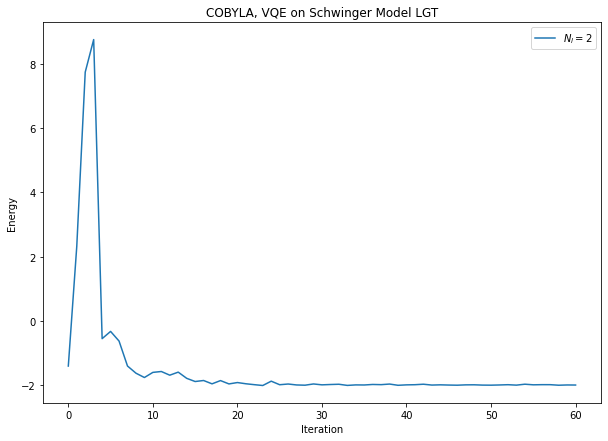

In [13]:
fig, ax = plt.subplots(nrows=1, figsize=[10,7])

ax.plot(list(range(len(trace))), trace, label='$N_l = $' + f'{num_layers}')
    
#ax.axhline(y=-3.78293464, ls='--', c='r')
    
ax.set_title(f'{optimizer}, VQE on Schwinger Model LGT')
ax.set_ylabel('Energy')
ax.set_xlabel('Iteration')
ax.legend()